In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Load and transpose data to expected format

In [3]:
df = pd.read_csv("Population.csv")
df = df.set_index("Country Name")
df = df.drop(["Country Code","Indicator Name","Indicator Code","Unnamed: 66"],axis = 1)
df_t = df.T
df_t_pre = df_t.copy()

In [4]:
x_future = np.array([[2022],[2023],[2024],[2025],[2026]])
df_t_pre.insert(0,"Year", df_t_pre.index)
year_list = x_future.tolist()
year_list = [int(i[0]) for i in year_list]
ignore_years = 40

In [5]:
new_row = pd.DataFrame({"Year":year_list}, index=year_list) 
df_t_pre_con = pd.concat([df_t_pre, new_row], axis=0)

### Loop over all countries

In [6]:
countries_name = df_t.columns.to_list()

In [7]:
df_t = df_t.iloc[ignore_years:]

Aruba


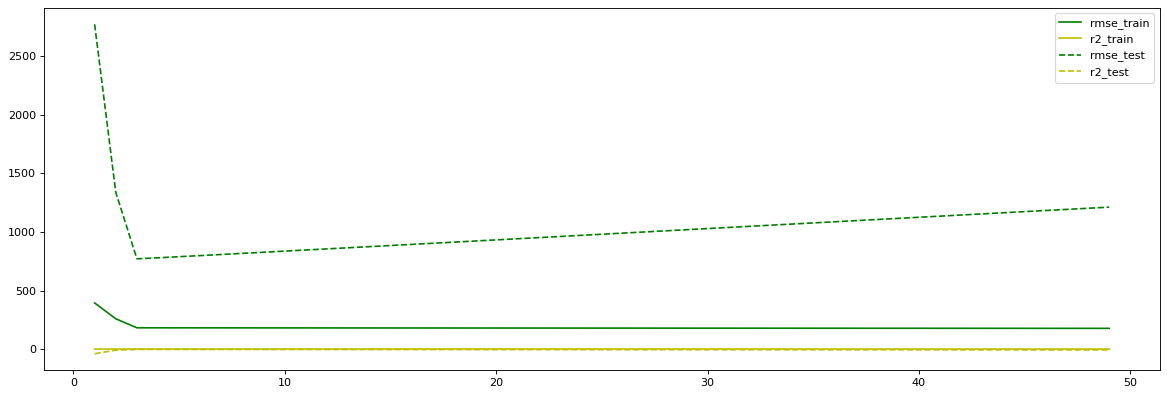

Aruba best_degree_number is: 3


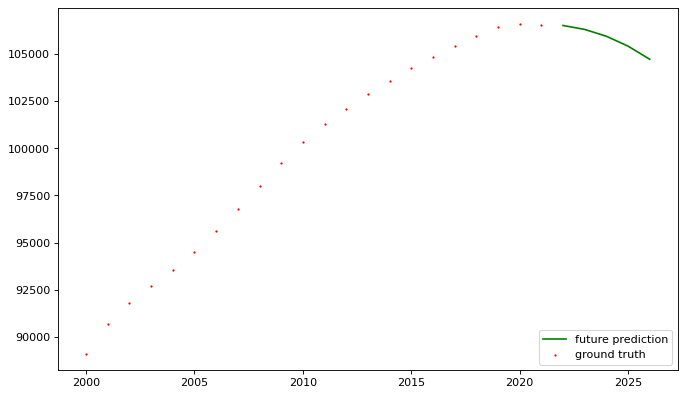

Africa Eastern and Southern
Africa Eastern and Southern best_degree_number is: 49
Afghanistan
Afghanistan best_degree_number is: 2
Africa Western and Central
Africa Western and Central best_degree_number is: 3
Angola
Angola best_degree_number is: 49
Albania
Albania best_degree_number is: 2
Andorra
Andorra best_degree_number is: 1
Arab World
Arab World best_degree_number is: 3
United Arab Emirates
United Arab Emirates best_degree_number is: 2
Argentina
Argentina best_degree_number is: 2
Armenia
Armenia best_degree_number is: 2
American Samoa
American Samoa best_degree_number is: 2
Antigua and Barbuda
Antigua and Barbuda best_degree_number is: 3
Australia
Australia best_degree_number is: 3
Austria
Austria best_degree_number is: 2
Azerbaijan
Azerbaijan best_degree_number is: 3
Burundi
Burundi best_degree_number is: 1
Belgium
Belgium best_degree_number is: 3
Benin
Benin best_degree_number is: 3
Burkina Faso
Burkina Faso best_degree_number is: 2
Bangladesh
Bangladesh best_degree_number is: 

Montenegro best_degree_number is: 2
Mongolia
Mongolia best_degree_number is: 2
Northern Mariana Islands
Northern Mariana Islands best_degree_number is: 2
Mozambique
Mozambique best_degree_number is: 2
Mauritania
Mauritania best_degree_number is: 49
Mauritius
Mauritius best_degree_number is: 3
Malawi
Malawi best_degree_number is: 3
Malaysia
Malaysia best_degree_number is: 2
North America
North America best_degree_number is: 2
Namibia
Namibia best_degree_number is: 2
New Caledonia
New Caledonia best_degree_number is: 49
Niger
Niger best_degree_number is: 3
Nigeria
Nigeria best_degree_number is: 28
Nicaragua
Nicaragua best_degree_number is: 47
Netherlands
Netherlands best_degree_number is: 3
Norway
Norway best_degree_number is: 31
Nepal
Nepal best_degree_number is: 49
Nauru
Nauru best_degree_number is: 2
New Zealand
New Zealand best_degree_number is: 3
OECD members
OECD members best_degree_number is: 2
Oman
Oman best_degree_number is: 1
Other small states
Other small states best_degree_nu

In [8]:
for country_name in countries_name:
    print (country_name)
    
    df_country = df_t[[country_name]].dropna()
    if len(df_country)==0:
        continue
    x = np.array(pd.to_numeric(df_country.index)).reshape(-1, 1)
    y = df_country[country_name]
    #x, y = x[ignore_years:], y[ignore_years:] # Get population from recent years
    train_len = int(len(x)*0.8)
    x_train, x_test, y_train, y_test = x[:train_len], x[train_len:], y[:train_len],y[train_len:]
    
    
    #Train model and get prediction
    result = {
    "Degree_Number" : [],
    "rmse_train" : [],
    "r2_train" : [],
    "rmse_test" : [],
    "r2_test" : [],
    }

    result_frame = pd.DataFrame(result)
    
    for degree_number in range(1,50):
        polynomial_features= PolynomialFeatures(degree=degree_number)
        x_poly_train = polynomial_features.fit_transform(x_train)
        x_poly_test = polynomial_features.fit_transform(x_test)

        model = LinearRegression()
        model.fit(x_poly_train, y_train)

        y_pred_train = model.predict(x_poly_train)
        rmse_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
        r2_train = r2_score(y_train,y_pred_train)

        y_pred_test = model.predict(x_poly_test)
        rmse_test = np.sqrt(mean_squared_error(y_test,y_pred_test))
        r2_test = r2_score(y_test,y_pred_test)
        result_frame = result_frame.append(pd.DataFrame({"Degree_Number":degree_number,"rmse_train":rmse_train, "r2_train": r2_train, "rmse_test":rmse_test, "r2_test": r2_test }, index = [degree_number]))
    
    
    # Plot result
    from matplotlib.pyplot import figure
    
    if country_name == "Aruba":
        figure(figsize=(18, 6), dpi=80)

        plt.plot(result_frame[["Degree_Number"]], result_frame[["rmse_train"]], label = "rmse_train", linestyle="-", color = "g")
        plt.plot(result_frame[["Degree_Number"]], result_frame[["r2_train"]], label = "r2_train", linestyle="-", color = "y")
        plt.plot(result_frame[["Degree_Number"]], result_frame[["rmse_test"]], label = "rmse_test", linestyle="--", color = "g")
        plt.plot(result_frame[["Degree_Number"]], result_frame[["r2_test"]], label = "r2_test", linestyle="--", color = "y")

        plt.legend()
        plt.show()
    
    # Get best degree number
    
    result_frame["rmse_train * rmse_test"] = result_frame["rmse_train"] * result_frame["rmse_test"]
    
    best_degree_number = int(result_frame.loc[result_frame["rmse_train * rmse_test"].idxmin()]["Degree_Number"])
    print (country_name + " best_degree_number is: " + str(best_degree_number))
    
    
    # Retrain with best degree number and make prediction for next 5 years
    polynomial_features= PolynomialFeatures(degree=best_degree_number)
    x_poly = polynomial_features.fit_transform(x)
    best_model = LinearRegression()
    best_model.fit(x_poly, y)
    
    
    x_poly_future = polynomial_features.fit_transform(x_future)
    y_future_pred = best_model.predict(x_poly_future)
    
    if country_name == "Aruba":
        figure(figsize=(10, 6), dpi=80)
        plt.scatter(x, y, s=1,color = "r",label = "ground truth")
        plt.plot(x_future, y_future_pred, color = "g", label = "future prediction")
        plt.legend(loc="lower right")
        plt.show()
    
    # Insert prediction to dataframe
    y_future_pred_list = y_future_pred.tolist()
    y_future_pred_list = [int(i) for i in y_future_pred]
    
    i = 0
    for year in year_list:
        df_t_pre_con.loc[[year],[country_name]] = y_future_pred_list[i]
        i +=1


In [9]:
df_t_pre_con.to_csv("./prediction/prediction.csv", index = False)

### Connect to PostgreSQL

In [10]:
import psycopg2 
import csv 
import pandas as pd
import os

In [11]:
create_table = True # We need to create a table to save prediction in PostgreSQL


# Connect to the PostgreSQL database 
conn = psycopg2.connect( 
    host='localhost', 
    database='Dashboard', 
    user='postgrepowerbi', 
    password='12345'
) 


# Open a cursor to perform database operations 
cursor = conn.cursor() 


# Define the CSV file path 
csv_dir = "./prediction"


# Loop through each CSV file in the directory
for file_name in os.listdir(csv_dir):
    print (file_name)
    
    if file_name.endswith('.csv'):
        table_name = file_name[:-4] 
        
        with open(f"prediction/{file_name}","r") as csvfile:
            reader = csv.reader(csvfile)
            header = next(reader) # Skip the header row
            header = [s.replace(" ", "_").replace(",", "_").replace("'", "_").replace(".", "_").replace("&", "_").replace("(", "_").replace(")", "_").replace("-", "_").replace(":", "_") for s in header]
            columns = " bigint, ".join(header)
            columns = columns + " bigint"
            
            if create_table:
                print(f"The table {table_name} does not exist in the database, and will be created")
                create_table_query = f"CREATE TABLE {table_name} ({columns})"
                print (create_table_query)
                cursor.execute(create_table_query)     
                conn.commit()

            for row in reader:
                values = [val if val != '' else 0 for val in row] # Replace empty strings with None
                #query = f"UPDATE {table_name} SET {', '.join([f'{header_name} = {val}' for header_name,val in zip(header,values)])}"
                query = f"INSERT INTO {table_name} {tuple(header)} VALUES {tuple(values)}".replace("'","")
                print (query)
                cursor.execute(query)
                #print ("query run")
                print (query)
                #print (values)
                conn.commit()
                
# Commit the changes and close the database connection
cursor.close()
conn.close()

prediction.csv
The table prediction does not exist in the database, and will be created
CREATE TABLE prediction (Year bigint, Aruba bigint, Africa_Eastern_and_Southern bigint, Afghanistan bigint, Africa_Western_and_Central bigint, Angola bigint, Albania bigint, Andorra bigint, Arab_World bigint, United_Arab_Emirates bigint, Argentina bigint, Armenia bigint, American_Samoa bigint, Antigua_and_Barbuda bigint, Australia bigint, Austria bigint, Azerbaijan bigint, Burundi bigint, Belgium bigint, Benin bigint, Burkina_Faso bigint, Bangladesh bigint, Bulgaria bigint, Bahrain bigint, Bahamas__The bigint, Bosnia_and_Herzegovina bigint, Belarus bigint, Belize bigint, Bermuda bigint, Bolivia bigint, Brazil bigint, Barbados bigint, Brunei_Darussalam bigint, Bhutan bigint, Botswana bigint, Central_African_Republic bigint, Canada bigint, Central_Europe_and_the_Baltics bigint, Switzerland bigint, Channel_Islands bigint, Chile bigint, China bigint, Cote_d_Ivoire bigint, Cameroon bigint, Congo__Dem__Re

DuplicateTable: relation "prediction" already exists
